# Sentiment Analysis in Python 

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Sentiment Analysis in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Sentiment Analysis Nuts and Bolts
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# CHAPTER 2 - Numeric Features from Reviews
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from langdetect import detect_langs

# CHAPTER 3 - More on Numeric Vectors: Transforming Tweets
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import time

# CHAPTER 4 - Let's Predict the Sentiment
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##  CHAPTER 1 - Sentiment Analysis Nuts and Bolts

#### Exercício 1 - welcome

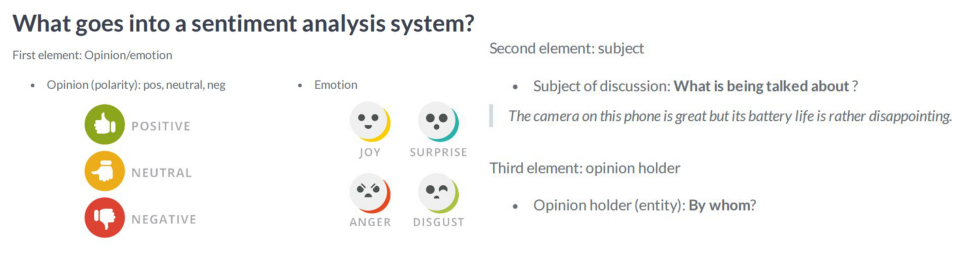

Why sentiment analysis?
- Social media monitoring
  - Not only what people are talking about but HOW they are talking about it.
  - Sentiment can be found also in forums, blogs, news.
- Brand monitoring
- Customer service
- Product analytics
- Market research and analysis

Movie reviews:


review  label
0  This short spoof can be found on Elite's Mille...      0
1  A singularly unfunny musical comedy that artif...      0
2  An excellent series, masterfully acted and dir...      1
3  The master of movie spectacle Cecil B. De Mill...      1
4  I was gifted with this movie as it had such a ...      0

In [5]:
#vídeo

plot_2('sentiment_1', 'sentiment_2'); 
print("""Why sentiment analysis?
- Social media monitoring
  - Not only what people are talking about but HOW they are talking about it.
  - Sentiment can be found also in forums, blogs, news.
- Brand monitoring
- Customer service
- Product analytics
- Market research and analysis\n"""); print("="*120)

###############################################################################################

# Movie reviews
movies = pd.read_csv(data_folder + "IMDB_sample.csv").drop('Unnamed: 0', axis=1)

print("Movie reviews:")
movies.head()

Exercício 2

In [6]:
# Elements of a sentiment analysis problem

# What are the three typical elements of a sentiment analysis system?
print("""Opinion, subject, and opinion holder.""")

Opinion, subject, and opinion holder.


Exercício 3

In [7]:
# How many positive and negative reviews are there?

print("How many positive and negative reviews?")
print(movies.label.value_counts())

print("\nPercentage of positive and negative reviews")
print(movies.label.value_counts() / len(movies))

How many positive and negative reviews?
0    3782
1    3719
Name: label, dtype: int64

Percentage of positive and negative reviews
0    0.504199
1    0.495801
Name: label, dtype: float64


Exercício 4

In [8]:
# Longest and shortest reviews

print("How long is the longest review?")
length_reviews = movies.review.str.len()
print(max(length_reviews))

print("\nHow long is the shortest review?")
print(min(length_reviews))

How long is the longest review?
10321

How long is the shortest review?
52


#### Exercício 5 - Sentiment analysis types and approaches

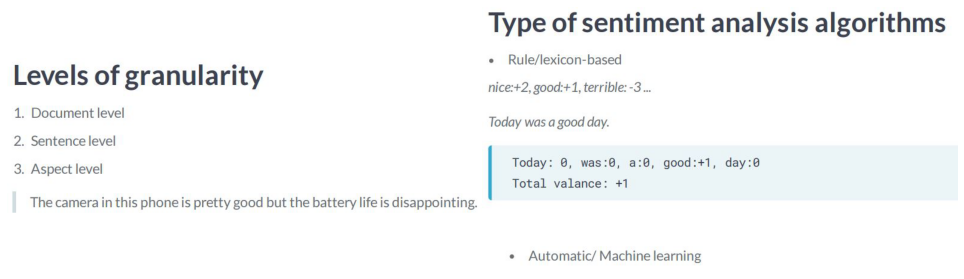

Valance:
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

*polarity* goes from -1 (very negative) to 0 (neutral) +1 (very positive)
*subjectivity* goes from 0 (very objective) to +1 (very subjective)


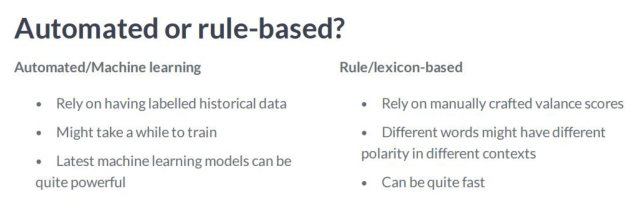

An hybrid approach between an Automated/Machine Learning or Rule/lexicon-based is often used.


In [9]:
#vídeo

plot_2('granularity', 'sentiment_analysis_type'); print("="*120)

# Whatis the valance of a sentence?
text = "Today was a good day."

from textblob import TextBlob

my_valance = TextBlob(text)

print("Valance:")
print(my_valance.sentiment)
print("""\n*polarity* goes from -1 (very negative) to 0 (neutral) +1 (very positive)
*subjectivity* goes from 0 (very objective) to +1 (very subjective)""")

print("="*120); plot_1('automated_', bottom=-1, right=1.44)
print("An hybrid approach between an Automated/Machine Learning or Rule/lexicon-based is often used.")

Exercício 6

In [10]:
# Detecting the sentiment of Tale of Two Cities

two_cities = """It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of 
foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of
Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, 
we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the
present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the
superlative degree of comparison only."""

# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

# do you agree with its overall slightly positive score?

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


Exercício 7

In [11]:
# Comparing the sentiment of two strings

# sentence from 'Anna Karenina'
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'

# sentence from 'The Catcher in the Rye'
catcher = """If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what
my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield
kind of crap, but I don't feel like going into it, if you want to know the truth."""

# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


Exercício 8

In [12]:
# What is the sentiment of a movie review?

titanic = open(data_folder + "titanic.txt", 'r').read()

# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)
print("""\nThe polarity is around 0.2 and the review is classified as positive (has a label of 1) in the movies dataset.""")

movies[movies.review.str.startswith("Titanic")] # it's the second one (Titanic directed by...)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

The polarity is around 0.2 and the review is classified as positive (has a label of 1) in the movies dataset.


review  label
1279  Titanic is a long but well made tragic adventu...      1
4930  Titanic directed by James Cameron presents a f...      1

#### Exercício 9 - Word cloud

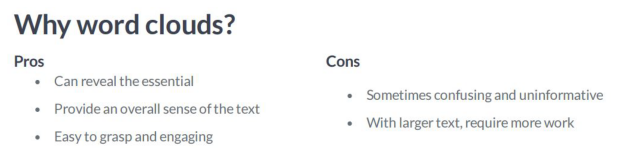

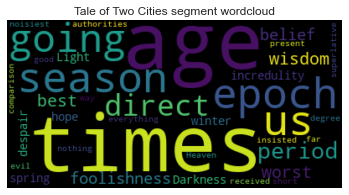

In [13]:
#vídeo   

plot_1('word_clouds', right=1.4)

from wordcloud import WordCloud

# Define the WordCloud object
cloud_two_cities = WordCloud().generate(two_cities)

# To see all arguments of the function (Background color; Size and font of the words, scaling; Stopwords)
# ?WordCloud

# How does cloud_two_cities look like?
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off'); plt.title('Tale of Two Cities segment wordcloud')
plt.show()

Exercício 10

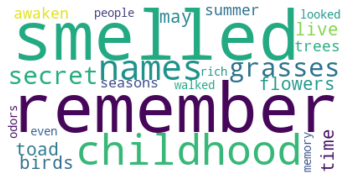

In [14]:
# Your first word cloud

east_of_eden = """I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what 
time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even.
The memory of odors is very rich."""

from wordcloud import WordCloud

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

Exercício 11

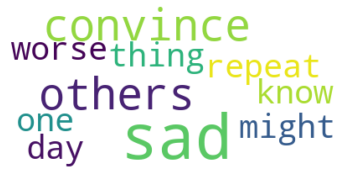

day, others, know


In [15]:
# Which words are in the word cloud?

# emotionally charged quote from the book 'Everything is Illuminated' by Jonathan Safran Foer.
illuminated = """I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince 
himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad."""

cloud_illuminated = WordCloud(background_color="white").generate(illuminated)
plt.imshow(cloud_illuminated, interpolation='bilinear')  
plt.axis('off'); plt.show()

# Which of the following answers contains only words you see in the word cloud?
print("day, others, know")

Exercício 12

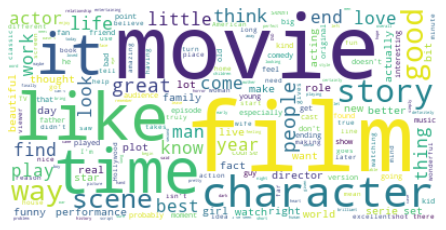

In [16]:
# Word Cloud on movie reviews

# In this exercise, you will practice building a word cloud of the top 100 positive reviews.
# Recall that the interpolation argument makes the word cloud appear more smoothly.

# top 100 positive reviews
descriptions = movies[movies['label'] == 1]['review'].str.cat()

# I'll use spacy stopwords
import spacy; spacy.load('en_core_web_sm')
my_stopwords = spacy.lang.en.stop_words.STOP_WORDS
my_stopwords.add('br')
##########################################################################################

# Import the word cloud function  
from wordcloud import WordCloud

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

# CHAPTER 2 - Numeric Features from Reviews

#### Exercício 1 - Bag-of-Words

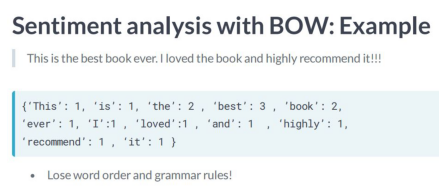

10  100  12  15  1984  20  30  40  451  50  ...  wrong  wrote  year  years  \
0   0    0   0   0     0   0   0   0    0   0  ...      0      0     0      0   
1   0    0   0   0     0   0   0   0    0   0  ...      0      0     0      1   
2   0    0   0   0     0   0   0   0    0   0  ...      0      0     0      1   
3   0    0   0   0     0   0   0   0    0   0  ...      0      0     0      0   
4   0    0   0   0     0   0   0   0    0   0  ...      0      1     0      0   

   yes  yet  you  young  your  yourself  
0    0    0    0      0     1         0  
1    0    0    1      0     0         0  
2    0    0    2      0     0         0  
3    0    0    0      0     0         0  
4    0    0    3      0     1         0  

[5 rows x 1000 columns]

In [17]:
#vídeo

amazon = pd.read_csv(data_folder + "amazon_reviews_sample.csv").drop('Unnamed: 0', axis=1)

plot_1('sentiment_bow')

# CountVectorizer function
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000)
vect.fit(amazon.review)
X = vect.transform(amazon.review)  # <10000x1000 sparse matrix of type '<class 'numpy.int64'>'
                                   #with 406668 stored elements in Compressed Sparse Row format>

# Transforming the vectorizer

# Transform to an array
my_array = X.toarray()

# Transform back to a dataframe, assign column names
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
X_df.head()

Exercício 2

In [18]:
# Which statement about BOW is true?

# You were introduced to a bag-of-words(BOW) and some of its characteristics in the video. Which of the following 
# statements about BOW is true?
print("""Bag-of-words is a simple but effective method to build a vocabulary of all the words occurring in a document.""")

Bag-of-words is a simple but effective method to build a vocabulary of all the words occurring in a document.


Exercício 3

In [19]:
# Your first BOW

# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']
print(annak, "\n")

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())


['Happy families are all alike;', 'every unhappy family is unhappy in its own way'] 

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


Exercício 4

In [20]:
# BOW using product reviews

reviews = amazon.copy()

from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)

# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]

#### Exercício 5 - Getting granular with n-grams

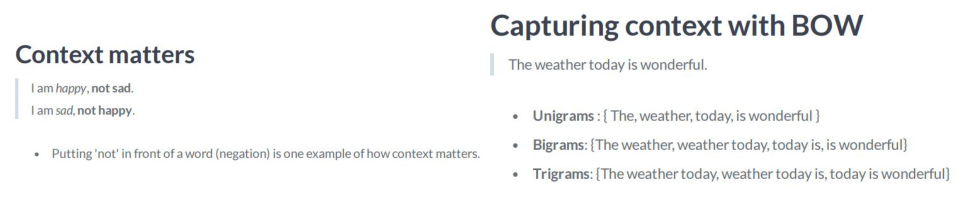

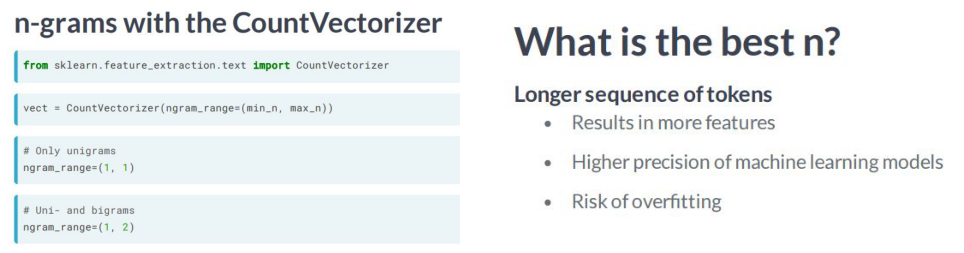

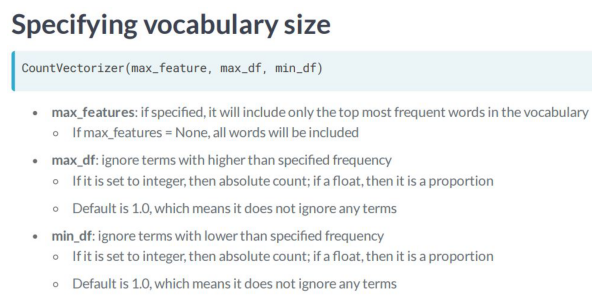

In [21]:
#vídeo

plot_2('context', 'context_bow'); plot_2('n_grams_countvectorizer', 'best_n', wspace=0.1); print("="*120)
plot_1('vocab_size', right=1.4)

Exercício 6

In [22]:
# Specify token sequence length with BOW

from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000) # pus max_features senão dava MemoryError
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

10  1984  20  30  able  able to  about  about it  about the  about this  \
0   0     0   0   0     0        0      0         0          0           0   
1   0     0   0   0     0        0      0         0          0           0   
2   0     0   0   0     0        0      0         0          0           0   
3   0     0   0   0     0        0      0         0          0           0   
4   0     0   0   0     0        0      0         0          0           0   

   ...  you have  you like  you ll  you re  you want  you will  young  your  \
0  ...         0         0       0       0         0         0      0     1   
1  ...         0         0       0       0         0         0      0     0   
2  ...         0         0       0       0         0         0      0     0   
3  ...         0         0       0       0         0         0      0     0   
4  ...         0         0       0       0         0         0      0     1   

   your money  yourself  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  

[5 rows x 1000 columns]

Exercício 7

In [23]:
# Size of vocabulary of movies reviews

from sklearn.feature_extraction.text import CountVectorizer 

# Using the movies dataset ...

# Limit the size of the vocabulary to 100.  ---> it will include only the 100 most frequent words in the vocabulary
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]

In [24]:
# Limit the size of the vocabulary to include terms which occur in no more than 200 documents.
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]

In [25]:
# Limit the size of the vocabulary to ignore terms which occur in less than 50 documents.

vect = CountVectorizer(min_df=50); 
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

#############################

# Any of the three methods you applied here can be used to limit the size of the vocabulary. 
# Which of the three methods you used resulted in the lowest number of constructed features?

000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]

Exercício 8

In [26]:
# BOW with n-grams and vocabulary size

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0         0         0        0          0           0         0          0  
1         0         0        0          0           0         0          0  
2         0         0        0          0           0         0          0  
3         0         0        0          0           0         0          0  
4         0         0        0          0           0         0          0  

[5 rows x 1000 columns]

#### Exercício 9 - Build new features

Goal : Enrich the existing dataset with features related to the text column (capturing the sentiment).



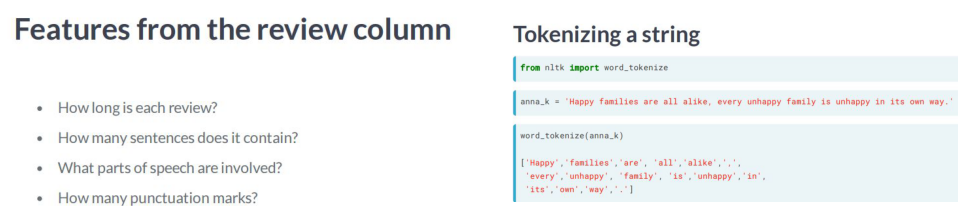

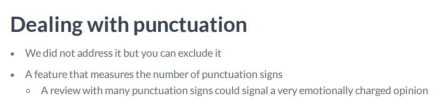

score                                             review  n_tokens
0      1   Stuning even for the non-gamer: This sound tr...        87
1      1   The best soundtrack ever to anything.: I'm re...       109
2      1   Amazing!: This soundtrack is my favorite musi...       165
3      1   Excellent Soundtrack: I truly like this sound...       145
4      1   Remember, Pull Your Jaw Off The Floor After H...       109

In [27]:
#vídeo

print("""Goal : Enrich the existing dataset with features related to the text column (capturing the sentiment).\n""")

plot_2('new_features', 'tokenize', wspace=0.1); plot_1('punctuation')

from nltk import word_tokenize

# Tokens from a column
word_tokens = [word_tokenize(review) for review in reviews.review]

# len of tokens from a column

len_tokens = []
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))
    
reviews['n_tokens'] = len_tokens
reviews.head()

Exercício 10

In [28]:
# Tokenize a string from GoT

GoT = """Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your 
weakness. Armour yourself in it, and it will never be used to hurt you."""

# Import the required function
from nltk import word_tokenize

# Transform the GoT string to word tokens
print(word_tokenize(GoT))


['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


Exercício 11

In [29]:
# Word tokens from the Avengers

avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)


[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd***', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


Exercício 12

In [30]:
# A feature for the length of a review

# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0], "\n")

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 
reviews.head()

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^'] 



score                                             review  n_tokens  n_words
0      1   Stuning even for the non-gamer: This sound tr...        87       87
1      1   The best soundtrack ever to anything.: I'm re...       109      109
2      1   Amazing!: This soundtrack is my favorite musi...       165      165
3      1   Excellent Soundtrack: I truly like this sound...       145      145
4      1   Remember, Pull Your Jaw Off The Floor After H...       109      109

#### Exercício 13 - Can you guess the language?

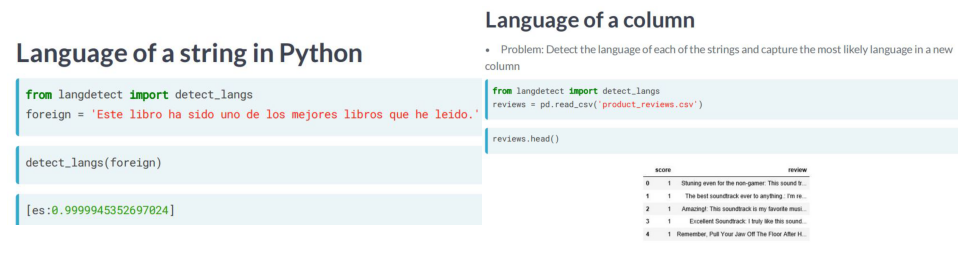

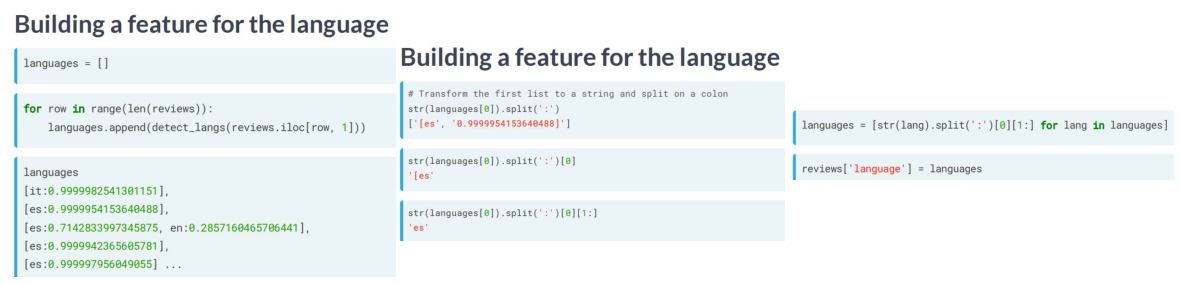

In [31]:
#vídeo 

from langdetect import detect_langs

plot_2('language_detection', 'language_column'); plot_3('feature_language', 'feature_language2', 'feature_language3')

Exercício 14

In [32]:
# Identify the language of a string

foreign = 'La histoire rendu étai fidèle, excellent, et grand.'

# Import the language detection function and package
from langdetect import detect_langs

# Detect the language of the foreign string
print(detect_langs(foreign))

[fr:0.9999973932342896]


Exercício 15

In [33]:
# Detect language of a list of strings

sentences = ['La histoire rendu étai fidèle, excellent, et grand.', 
             'Excelente muy recomendable.', 
             'It had a leak from day one but the return and exchange process was very quick.']

languages = []

# Loop over the sentences in the list and detect their language
for sentence in range(len(sentences)):
    languages.append(detect_langs(sentences[sentence]))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.9999955415787145], [es:0.9999975940154714], [en:0.9999978874986116]]


Exercício 16

In [34]:
# Language detection of product reviews

index_non_english = [1249, 1259, 1260, 1261, 1639, 1745, 2316, 2486, 2760, 2903, 2908, 3318, 3694, 4820, 4914, 5720, 5875, 
                     5901, 6234, 6631, 7078, 7307, 7888, 7983, 8018, 8340, 9265, 9422, 9624]

non_english_reviews = reviews.iloc[index_non_english].drop(['n_tokens', 'n_words'], axis=1)

#####################################################################################################################

from langdetect import detect_langs
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(non_english_reviews)):
    languages.append(detect_langs(non_english_reviews.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
non_english_reviews['language'] = languages

non_english_reviews.head(10)

score                                             review language
1249      1   Il grande ritorno!: E' dai tempi del tour di ...       it
1259      1   La reencarnación vista por un científico: El ...       es
1260      1   Excelente Libro / Amazing book!!: Este libro ...       es
1261      1   Magnifico libro: Brian Weiss ha dejado una ma...       es
1639      1   El libro mas completo que existe para nosotra...       es
1745      1   Excelente!: Una excelente guía para todos aqu...       es
2316      1   Nightwish is unique and rocks for eva: Moi to...       fr
2486      1   Palabras de aliento para tu caminar con Dios:...       es
2760      0   Completement nul: Fait sur commande et ennuya...       fr
2903      1   fabuloso: mil gracias por el producto fabulos...       es

# CHAPTER 3 - More on Numeric Vectors: Transforming Tweets


#### Exercício 1 - Stop words

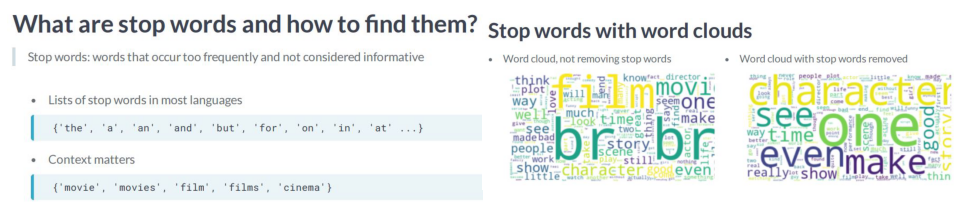

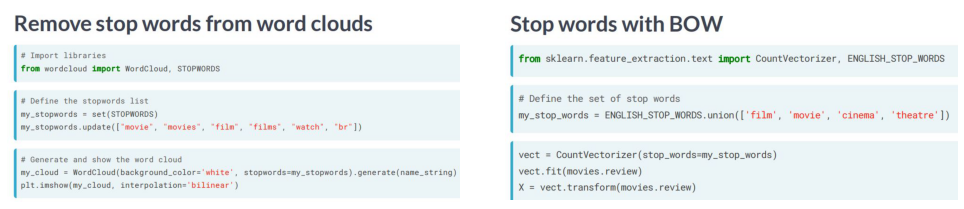

In [35]:
#vídeo

plot_2('stop_words', 'stop_words_cloud'); from wordcloud import WordCloud, STOPWORDS
plot_2('remove_stopwords', 'stopwords_BOW', wspace=0.1)
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

Exercício 2

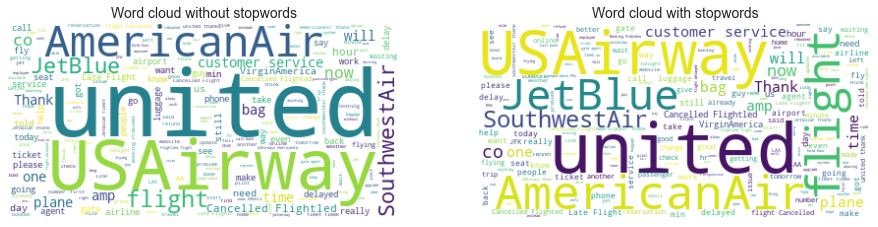

Not a big difference. Perhaps the stopwords list needs to be enriched.


In [36]:
# Word cloud of tweets

# all text tweets
text_tweet = pd.read_csv(data_folder + "Tweets.csv").text.str.cat()

# Import the word cloud function 
from wordcloud import WordCloud, STOPWORDS

# Word cloud without stopwords
my_cloud = WordCloud(background_color='white').generate(text_tweet)
plt.subplot(1, 2, 1)
plt.imshow(my_cloud, interpolation='bilinear') 
plt.title('Word cloud without stopwords', fontsize=14)
plt.axis("off")

# Word cloud with stopwords
plt.subplot(1, 2, 2)
my_stop_words = set(STOPWORDS).update(['airline', 'airplane'])
my_cloud = WordCloud(background_color='white', stopwords=my_stop_words).generate(text_tweet)
plt.imshow(my_cloud, interpolation='bilinear') 
plt.title('Word cloud with stopwords', fontsize=14)
plt.axis("off")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

print("Not a big difference. Perhaps the stopwords list needs to be enriched.")

Exercício 3

In [37]:
# Airline sentiment with stop words

tweets = pd.read_csv(data_folder + "Tweets.csv")

# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)

# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

print("""Notice how in this case the created features contain digits and other characters. Social media data can in general
be quite messy and in a later video we will learn how to remove all digits and other characters and retain only more 
meaningful features.""")
X_df.head()

Notice how in this case the created features contain digits and other characters. Social media data can in general
be quite messy and in a later video we will learn how to remove all digits and other characters and retain only more 
meaningful features.


00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 14768 columns]

Exercício 4

In [38]:
# Multiple text columns

tweets = pd.read_csv(data_folder + "Tweets.csv")[['airline_sentiment', 'text', 'negativereason']].dropna()

# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 

vect1.fit(tweets['text'])
vect2.fit(tweets['negativereason'])

# Print the last 15 features from the first, and all from second vectorizer
print("Last 15 from text: \n", vect1.get_feature_names()[-15:], "\n")
print("Last 15 from reasons: \n", vect2.get_feature_names(), "\n")

print("""We can have multiple text columns in a single dataset. In that case, we can transform each of them to numeric
features separately, using different arguments in the CountVectorizer() function.""")

tweets.head()

Last 15 from text: 
 ['zira2z3udc', 'zkatcher', 'zkoe6clgiu', 'zl4bvexmcj', 'zombie', 'zone', 'zones', 'zoom', 'zouowgv3q6', 'zrh', 'zukes', 'zurich', 'zv6cfpohl5', 'zvfmxnuelj', 'zzps5ywve2'] 

Last 15 from reasons: 
 ['attendant', 'bad', 'booking', 'cancelled', 'complaints', 'customer', 'damaged', 'flight', 'issue', 'late', 'longlines', 'lost', 'luggage', 'problems', 'service', 'tell'] 

We can have multiple text columns in a single dataset. In that case, we can transform each of them to numeric
features separately, using different arguments in the CountVectorizer() function.


airline_sentiment                                               text  \
3           negative  @VirginAmerica it's really aggressive to blast...   
4           negative  @VirginAmerica and it's a really big bad thing...   
5           negative  @VirginAmerica seriously would pay $30 a fligh...   
15          negative      @VirginAmerica SFO-PDX schedule is still MIA.   
17          negative  @VirginAmerica  I flew from NYC to SFO last we...   

   negativereason  
3      Bad Flight  
4      Can't Tell  
5      Can't Tell  
15    Late Flight  
17     Bad Flight

#### Exercício 5 - Capturing a token pattern

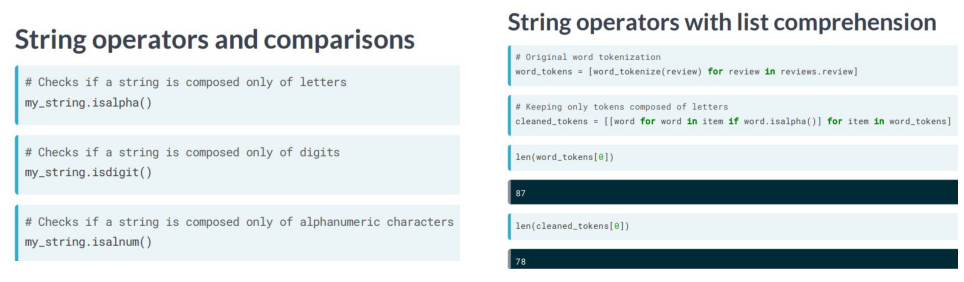

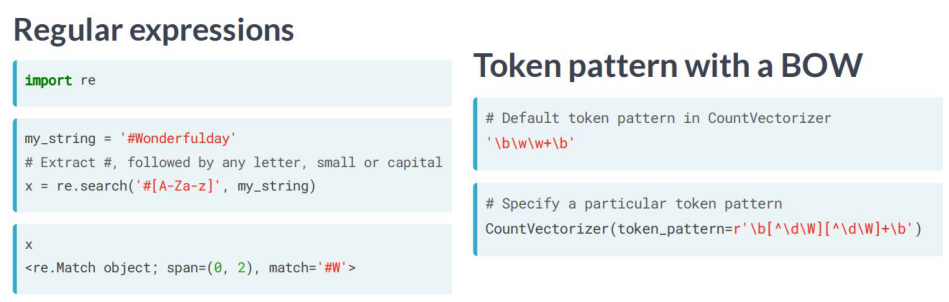

In [39]:
#vídeo

plot_2('string_operators', 'string_operators2', wspace=0.1); plot_2('regex', 'token_bow')

Exercício 6

In [40]:
# Specify the token pattern

# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  10836
Length of vectorizer 2:  529


Exercício 7

In [41]:
# String operators with the Twitter data

# Import the word tokenizing package
from nltk import word_tokenize 

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('\nCleaned tokens: ', cleaned_tokens[0])


Original tokens:  ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']

Cleaned tokens:  ['VirginAmerica', 'it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']


Exercício 8

In [42]:
# More string operators and Twitter

# 3 selected strings from the tweets dataset
tweets_list = ["""@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they 
               have little recourse""", 
               """@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights 
               added to my Elevate account. Help?""", 
               """@united Change made in just over 3 hours. For something that should have taken seconds online, I am not
               thrilled. Loved the agent, though."""]

######################################################################################################################

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]

# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]

# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('\nLast item in list of alphanumerics: ', let_digits[2])
print('\nLast item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']

Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']

Last item in the list of digits:  ['3']


#### Exercício 9 - Stemming and lemmatization

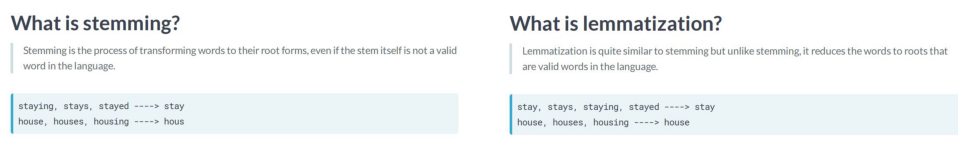

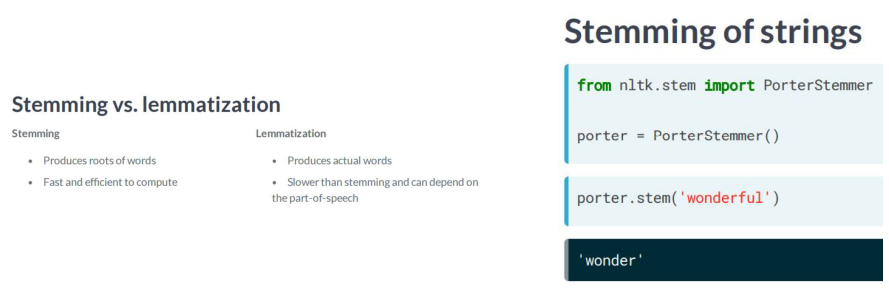

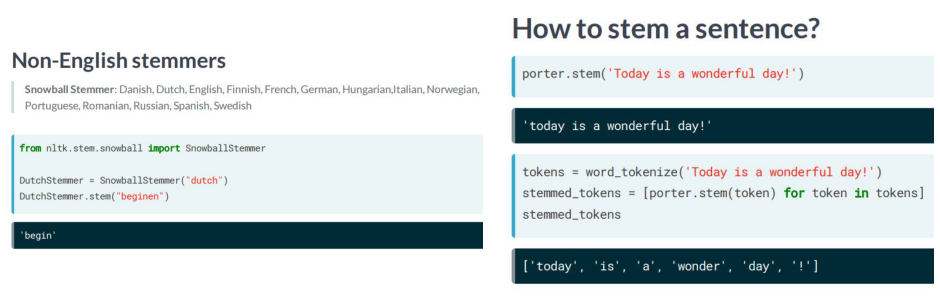

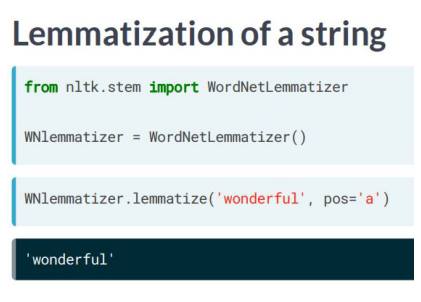

In [43]:
#vídeo

plot_2('stemming', 'lemmatization', wspace=0.1); plot_2('stem_lemm', 'stemm_strings')
plot_2('non_english_stemm', 'how_stemm'); plot_1('lemm_string')

# stemming
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# lemmatization
from nltk.stem import WordNetLemmatizer

Exercício 10

In [44]:
# Stems and lemmas from GoT

# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

import time

# Tokenize the GoT string
start_time = time.time()
tokens = word_tokenize(GoT) 
end_time = time.time()

print('Time taken for word_tokenizing in seconds: ', end_time - start_time)
print(tokens)

Time taken for word_tokenizing in seconds:  0.0009999275207519531
['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [45]:
# Build a stemmed list
start_time = time.time()
stemmed_tokens = [porter.stem(token) for token in tokens] 
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('\nStemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0019991397857666016

Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [46]:
# Build a lemmatized list
start_time = time.time()
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('\nLemmatized tokens: ', lem_tokens) 
print("""\n Lemmatization takes way longer than stemmatization.""")

Time taken for lemmatizing in seconds:  3.119333505630493

Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']

 Lemmatization takes way longer than stemmatization.


Exercício 11

In [47]:
# Stem Spanish reviews

# Import the language detection package
from langdetect import detect_langs

# Loop over the rows of the dataset and append  
languages = [] 
for i in range(len(non_english_reviews)):
    languages.append(detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
non_english_reviews['language'] = languages

# Select the Spanish ones
non_english_reviews = non_english_reviews[non_english_reviews.language == 'es']
non_english_reviews.head()

score                                             review language
1259      1   La reencarnación vista por un científico: El ...       es
1260      1   Excelente Libro / Amazing book!!: Este libro ...       es
1261      1   Magnifico libro: Brian Weiss ha dejado una ma...       es
1639      1   El libro mas completo que existe para nosotra...       es
1745      1   Excelente!: Una excelente guía para todos aqu...       es

In [48]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in non_english_reviews.review] 

# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokens
print("First spanish review:\n ", non_english_reviews['review'].iloc[0])
print("\nStemmatization:\n", stemmed_tokens[0])

First spanish review:
   La reencarnación vista por un científico: El primer libro del Dr. Weiss sigue siendo un gran libro para todos aquellos a quienes les inquieta el tema de la reencarnación, así no crean en ella.


Stemmatization:
 ['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


Exercício 12

In [49]:
# Stems from tweets

# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(token) for token in tweets_list]

# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 

# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'it', "'s", 'realli', 'aggress', 'to', 'blast', 'obnoxi', "'entertain", "'", 'in', 'your', 'guest', "'", 'face', '&', 'amp', ';', 'they', 'have', 'littl', 'recours']


#### Exercício 13 - Tf-Idf: More ways to transform text

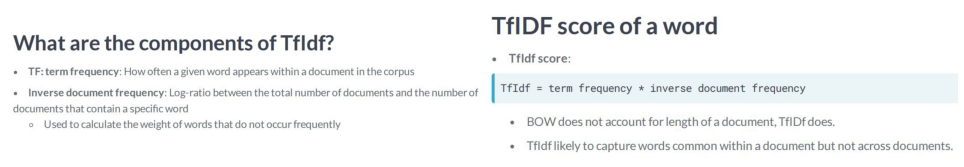

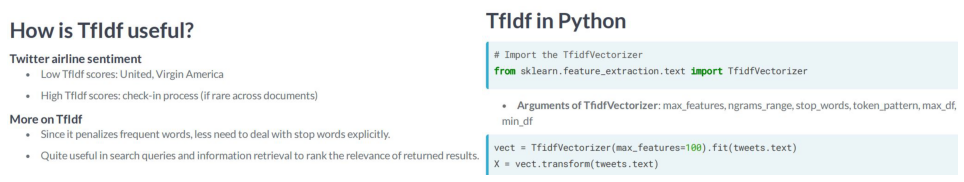

words with weights:


about  after  again  airline  all   am  americanair       amp   an  \
0  0.000000    0.0    0.0      0.0  0.0  0.0          0.0  0.484938  0.0   
1  0.565891    0.0    0.0      0.0  0.0  0.0          0.0  0.000000  0.0   
2  0.450089    0.0    0.0      0.0  0.0  0.0          0.0  0.000000  0.0   
3  0.000000    0.0    0.0      0.0  0.0  0.0          0.0  0.000000  0.0   
4  0.000000    0.0    0.0      0.0  0.0  0.0          0.0  0.000000  0.0   

        and  ...  was   we  what  when  why  will  with     would  you  \
0  0.000000  ...  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.000000  0.0   
1  0.307545  ...  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.000000  0.0   
2  0.000000  ...  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.451564  0.0   
3  0.000000  ...  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.000000  0.0   
4  0.256390  ...  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.000000  0.0   

       your  
0  0.364508  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  

[5 rows x 100 columns]

In [50]:
#vídeo

plot_2('tf_idf', 'tf_idf2'); plot_2('tf_idf3', 'tf_idf4')

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=100).fit(tweets.text)

X = vect.transform(tweets.text)

X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print("words with weights:")
X_df.head()

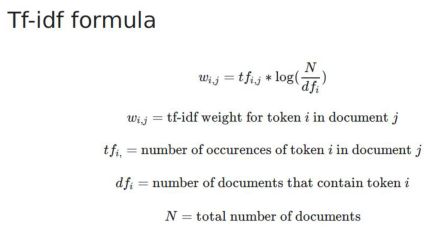

In [51]:
# Tf-Idf formula
plot_1('tf-idf_formula')

Exercício 14

In [52]:
# Your first TfIdf

# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

# Do you recall building a bag-of-words representation for the same data earlier? What differences do you notice?

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


Exercício 15

In [53]:
# TfIdf on Twitter airline sentiment data

# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), 
                       max_features=100, 
                       token_pattern=my_pattern, 
                       stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ')
X.head()

Top 5 rows of the DataFrame: 


aa  agent  airline  airport  americanair       amp       bad  bag  \
0  0.0    0.0      0.0      0.0          0.0  0.509923  0.000000  0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.602806  0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.410963  0.0   
3  0.0    0.0      0.0      0.0          0.0  0.000000  0.000000  0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.000000  0.0   

   baggage  bags  ...   ve  virginamerica  wait  waiting  want  way  weather  \
0      0.0   0.0  ...  0.0       0.620798   0.0      0.0   0.0  0.0      0.0   
1      0.0   0.0  ...  0.0       0.575815   0.0      0.0   0.0  0.0      0.0   
2      0.0   0.0  ...  0.0       0.392562   0.0      0.0   0.0  0.0      0.0   
3      0.0   0.0  ...  0.0       1.000000   0.0      0.0   0.0  0.0      0.0   
4      0.0   0.0  ...  0.0       0.619339   0.0      0.0   0.0  0.0      0.0   

   won  work  worst  
0  0.0   0.0    0.0  
1  0.0   0.0    0.0  
2  0.0   0.0    0.0  
3  0.0   0.0    0.0  
4  0.0   0.0    0.0  

[5 rows x 100 columns]

Exercício 16

In [54]:
# Tfidf and a BOW on same data

# Import the required packages
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)

# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())

print('Top 5 rows using BOW: \n')
X_df1.head()

Top 5 rows using BOW: 



about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]

In [55]:
print('Top 5 rows using tfidf: \n')
X_df2.head()

Top 5 rows using tfidf: 



about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000000   0.0  0.0  0.00000  0.191572  0.175388   
2    0.0  0.000000  0.285009   0.0  0.0  0.10526  0.192539  0.000000   
3    0.0  0.000000  0.000000   0.0  0.0  0.00000  0.554705  0.000000   
4    0.0  0.174214  0.000000   0.0  0.0  0.00000  0.197188  0.000000   

        are        as  ...  what  when    which       who  will      with  \
0  0.000000  0.000000  ...   0.0   0.0  0.00000  0.351952   0.0  0.113371   
1  0.116940  0.000000  ...   0.0   0.0  0.00000  0.000000   0.0  0.000000   
2  0.088148  0.090385  ...   0.0   0.0  0.13013  0.120301   0.0  0.000000   
3  0.112868  0.000000  ...   0.0   0.0  0.00000  0.000000   0.0  0.000000   
4  0.120369  0.000000  ...   0.0   0.0  0.00000  0.000000   0.0  0.000000   

       work     would       you      your  
0  0.000000  0.306757  0.000000  0.175024  
1  0.000000  0.139101  0.106279  0.000000  
2  0.139218  0.104853  0.160223  0.000000  
3  0.000000  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.328184  0.163385  

[5 rows x 100 columns]

# CHAPTER 4 - Let's Predict the Sentiment


#### Exercício 1 - Predict the sentiment

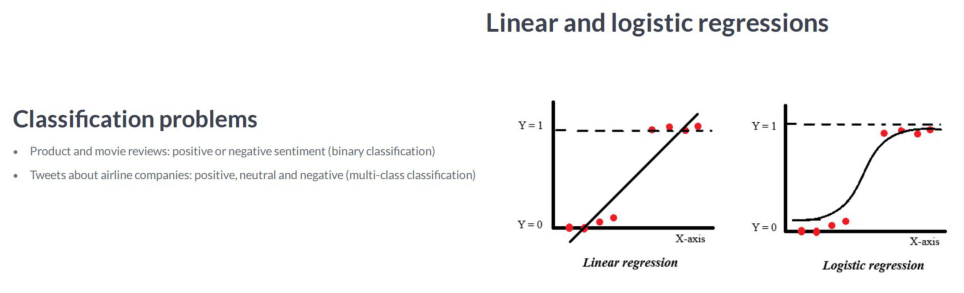

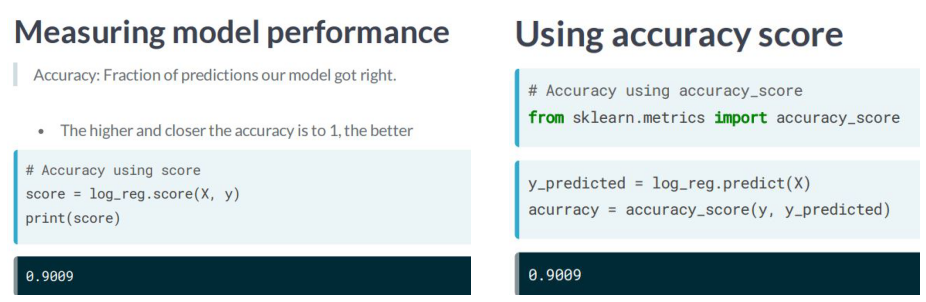

In [56]:
#vídeo

plot_2('classification', 'linear_logistic'); plot_2('model_performance', 'accuracy')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Exercício 2

In [57]:
# Logistic regression of movie reviews

# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# The text review has been transformed, using BOW, to numeric columns.
vect = CountVectorizer(max_features=200).fit(movies.review)
X = vect.transform(movies.review)

movies2 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
movies2['label'] = movies['label'].copy()

# Define the vector of targets and matrix of features
y = movies2.label
X = movies2.drop('label', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.787095053992801


Exercício 3

In [58]:
# Logistic regression using Twitter data

# The target is given by the airline_sentiment, which is 0 for negative tweets, 1 for neutral, and 2 for positive ones.

# PREPROCESSING

# dataset
tweets = pd.read_csv(data_folder + "Tweets.csv")

# label encode the target variable
from sklearn.preprocessing import LabelEncoder
tweets['airline_sentiment'] = LabelEncoder().fit_transform(tweets['airline_sentiment'])

# get dummies on the airlines, and (negative)reasons
tweets = tweets.join(pd.get_dummies(tweets['airline'], prefix='airline'))
tweets = tweets.join(pd.get_dummies(tweets['negativereason'], prefix='reason'))
tweets = tweets.drop(['airline', 'negativereason', 'tweet_id', 'name', 'airline_sentiment_gold', 
                      'negativereason_gold', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

# add BoW model
vect = CountVectorizer(max_features=100).fit(tweets.text)
X = vect.transform(tweets.text)
tweets2 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
tweets = tweets.join(tweets2)
tweets = tweets.drop(['text'], axis=1).dropna()
tweets.head()

airline_sentiment  airline_sentiment_confidence  negativereason_confidence  \
1                  2                        0.3486                     0.0000   
3                  0                        1.0000                     0.7033   
4                  0                        1.0000                     1.0000   
5                  0                        1.0000                     0.6842   
6                  2                        0.6745                     0.0000   

   retweet_count  airline_American  airline_Delta  airline_Southwest  \
1              0                 0              0                  0   
3              0                 0              0                  0   
4              0                 0              0                  0   
5              0                 0              0                  0   
6              0                 0              0                  0   

   airline_US Airways  airline_United  airline_Virgin America  ...  was  we  \
1                   0               0                       1  ...    0   0   
3                   0               0                       1  ...    0   0   
4                   0               0                       1  ...    0   0   
5                   0               0                       1  ...    0   0   
6                   0               0                       1  ...    0   0   

   what  when  why  will  with  would  you  your  
1     0     0    0     0     0      0    1     0  
3     0     0    0     0     0      0    0     1  
4     0     0    0     0     0      0    0     0  
5     0     0    0     0     0      1    0     0  
6     0     0    0     0     0      0    0     0  

[5 rows x 120 columns]

In [59]:
# Define the vector of targets and matrix of features
y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression(max_iter=1000).fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

# Create an array of prediction
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.9775708040296521
Accuracy of logistic regression:  0.9775708040296521


#### Exercício 4 - Did we really predict the sentiment well?

In [60]:
#vídeo

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# stratify: proportion of classes in the sample produced will be the same as the proportion of
#           values provided to this parameter

Exercício 5

In [61]:
# Build and assess a model: movies reviews

vect = CountVectorizer(max_features=200).fit(movies.review)
X = vect.transform(movies.review)
movies2 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
movies2['label'] = movies['label'].copy()

# Define the vector of targets and matrix of features
y = movies2.label
X = movies2.drop('label', axis=1)

######################################################################################################

# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies2.label
X = movies2.drop('label', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.789
Accuracy on test set:  0.7475016655562958


Exercício 6

In [62]:
# Performance metrics of Twitter data

y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('\nConfusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))
print("""\nAlthough the sentiment category here has 3 classes instead of 2, the way we trained and evaluated the model is
the same as with 2 classes. The accuracy on the test data was good and the confusion matrix can also show us which category 
we are bad at predicting.""")

Accuracy score test set:  0.974025974025974

Confusion matrix test set: 
 [[0.87234717 0.         0.        ]
 [0.         0.08964207 0.00665188]
 [0.         0.01932214 0.01203674]]

Although the sentiment category here has 3 classes instead of 2, the way we trained and evaluated the model is
the same as with 2 classes. The accuracy on the test data was good and the confusion matrix can also show us which category 
we are bad at predicting.


Exercício 7

In [63]:
# Build and assess a model: product reviews data

vect = CountVectorizer(max_features=200).fit(amazon.review)
X = vect.transform(amazon.review)
amazon2 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
amazon2['score'] = amazon['score'].copy()

# Define the vector of targets and matrix of features
y = amazon2['score']
X = amazon2.drop('score', axis=1)

##############################################################################################

# Import the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('\nConfusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.789

Confusion matrix of test data: 
 [[0.40233333 0.10366667]
 [0.10733333 0.38666667]]


#### Exercício 8 - Logistic regression: revisited

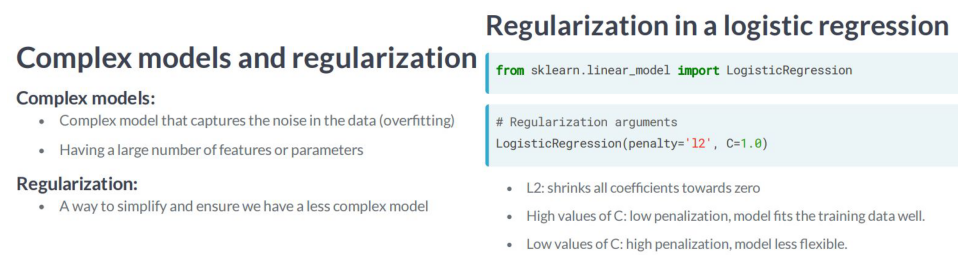

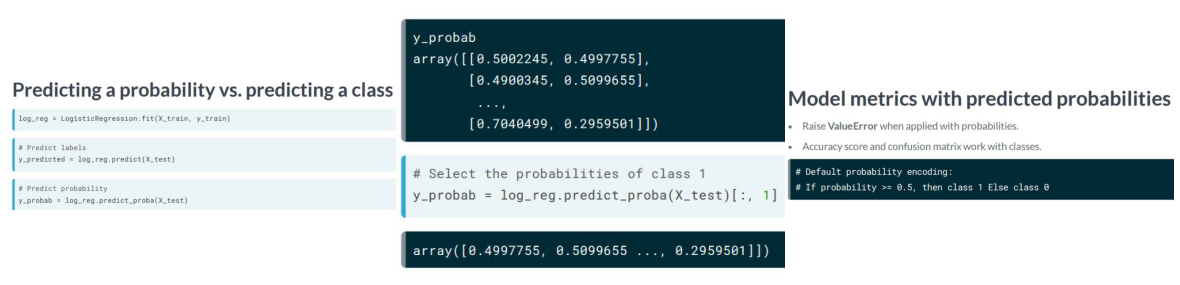

In [64]:
#vídeo

plot_2('complex_models', 'regularization'); plot_3('predict_proba_class', 'predict_proba_class2', 'model_metrics')

Exercício 9

In [65]:
# Predict probabilities of movie reviews

y = movies2.label
X = movies2.drop('label', axis=1)

#######################################################

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("\nFirst 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.86543352 0.83340427 0.62046963 0.166061   0.87248749 0.87887064
 0.6293525  0.77538108 0.45488125 0.31192911]

First 10 predicted probabilities of class 1:  [0.13456648 0.16659573 0.37953037 0.833939   0.12751251 0.12112936
 0.3706475  0.22461892 0.54511875 0.68807089]


Exercício 10

In [66]:
# Product reviews with regularization

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.7514990006662225
Accuracy of model 2:  0.7501665556295802


Exercício 11

In [67]:
# Regularizing models with Twitter data

y = tweets.airline_sentiment
X = tweets.drop('airline_sentiment', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

##############################################################################

# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('\nConfusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('\nConfusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.9730757047830219
Accuracy of model 2:  0.9730757047830219

Confusion matrix of model 1: 
 [[0.87234717 0.         0.        ]
 [0.         0.08805828 0.00823567]
 [0.         0.01868863 0.01267026]]

Confusion matrix of model 2: 
 [[8.72347165e-01 0.00000000e+00 0.00000000e+00]
 [3.16756414e-04 9.24928730e-02 3.48432056e-03]
 [0.00000000e+00 2.31232182e-02 8.23566677e-03]]


#### Exercício 12 - Bringing it all together

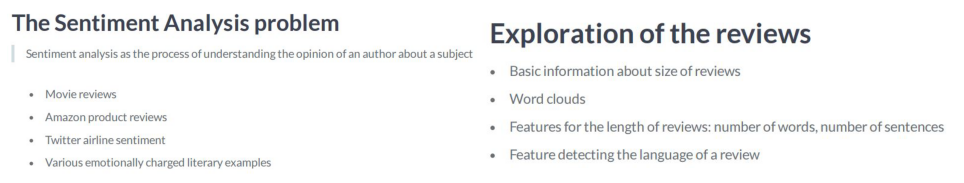

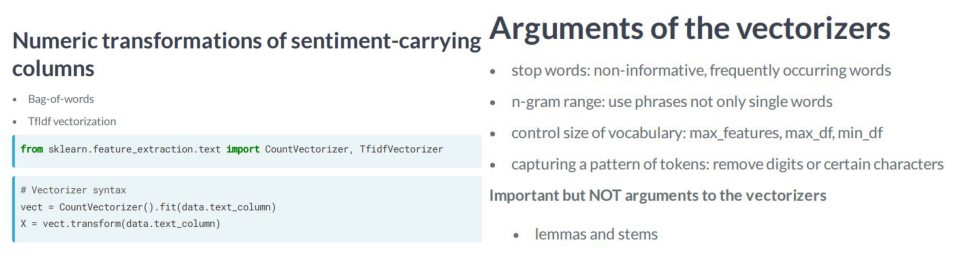

+supervised learning


In [68]:
#vídeo
plot_2('sentiment', 'reviews'); plot_2('num_transfomations', 'arguments_vectorizers'); print("+supervised learning")

Exercício 13

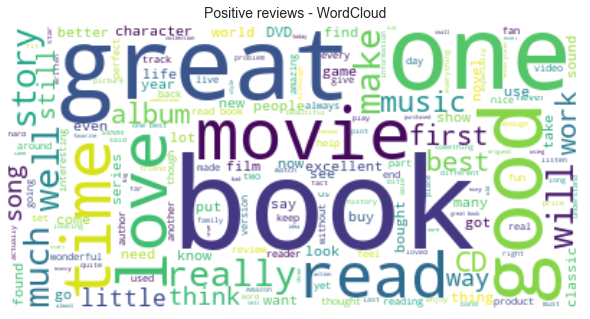

In [69]:
# Step 1: Word cloud and feature creation

# all positive reviews
positive_reviews = reviews[reviews['score'] == 1]['review'].str.cat()

# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")
plt.title('Positive reviews - WordCloud', fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0.2, hspace=0)
plt.show()

In [70]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 
reviews.head()

score                                             review  n_tokens  n_words
0      1   Stuning even for the non-gamer: This sound tr...        87       87
1      1   The best soundtrack ever to anything.: I'm re...       109      109
2      1   Amazing!: This soundtrack is my favorite musi...       165      165
3      1   Excellent Soundtrack: I truly like this sound...       145      145
4      1   Remember, Pull Your Jaw Off The Floor After H...       109      109

Exercício 14

In [71]:
# Step 2: Building a vectorizer

# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, 
                       token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)

# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

####

# enrich it

# add score & number of words
reviews_transformed['score'] = reviews['score'].copy()
reviews_transformed['n_words'] = reviews['review'].apply(lambda x: len(word_tokenize(x)))

# head
reviews_transformed.head()

able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...  world  worst     worth  writing  written  wrong  year     years  \
0  0.0  ...    0.0    0.0  0.000000      0.0      0.0    0.0   0.0  0.000000   
1  0.0  ...    0.0    0.0  0.219408      0.0      0.0    0.0   0.0  0.208885   
2  0.0  ...    0.0    0.0  0.160089      0.0      0.0    0.0   0.0  0.152410   
3  0.0  ...    0.0    0.0  0.000000      0.0      0.0    0.0   0.0  0.000000   
4  0.0  ...    0.0    0.0  0.000000      0.0      0.0    0.0   0.0  0.000000   

   score  n_words  
0      1       87  
1      1      109  
2      1      165  
3      1      145  
4      1      109  

[5 rows x 202 columns]

Exercício 15

In [72]:
# Step 3: Building a classifier

# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.4115 0.1145]
 [0.0965 0.3775]]


#### Exercício 16 - end

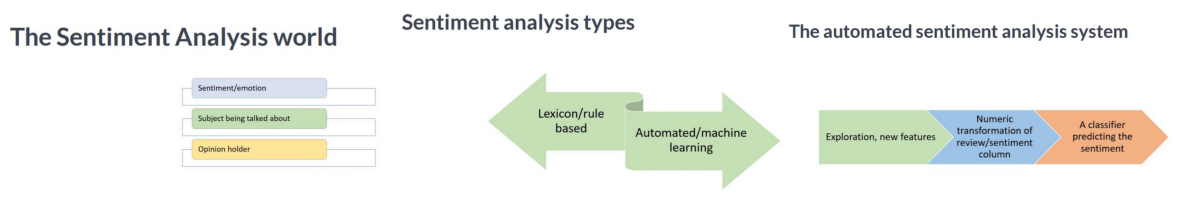

In [73]:
#vídeo
plot_3('sent1', 'sent2', 'sent3')

# Fim